In [1]:
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from keras.utils.np_utils import to_categorical
import random,shutil


In [2]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):
    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)


In [7]:
BS= 30
TS=(24,24)
train_batch= generator('C:\\Users\\simra\\Desktop\\Implement\\data\\train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('C:\\Users\\simra\\Desktop\\Implement\\data\\valid',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
106 26


In [8]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#64 convolution filters used each of size 3x3
#choose the best features via pooling
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit_generator(train_batch, validation_data=valid_batch,epochs=20,steps_per_epoch=SPE ,validation_steps=VS)

Epoch 1/20


C:\Users\simra\AppData\Local\Temp\ipykernel_20076\1503456693.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batch, validation_data=valid_batch,epochs=20,steps_per_epoch=SPE ,validation_steps=VS)


106/106 [==============================] - 13s 93ms/step - loss: 0.2380 - accuracy: 0.8953 - val_loss: 0.0583 - val_accuracy: 0.9795
Epoch 2/20
106/106 [==============================] - 8s 77ms/step - loss: 0.0427 - accuracy: 0.9893 - val_loss: 0.0216 - val_accuracy: 0.9910
Epoch 3/20
106/106 [==============================] - 8s 77ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0322 - val_accuracy: 0.9897
Epoch 4/20
106/106 [==============================] - 8s 79ms/step - loss: 0.0216 - accuracy: 0.9918 - val_loss: 0.0156 - val_accuracy: 0.9936
Epoch 5/20
106/106 [==============================] - 8s 79ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0479 - val_accuracy: 0.9833
Epoch 6/20
106/106 [==============================] - 8s 79ms/step - loss: 0.0259 - accuracy: 0.9934 - val_loss: 0.0372 - val_accuracy: 0.9885
Epoch 7/20
106/106 [==============================] - 9s 80ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.0381 - val_accuracy: 0.9897
Epoch 8/2

In [11]:
model.save('models/detect.h5', overwrite=True)

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)      

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))


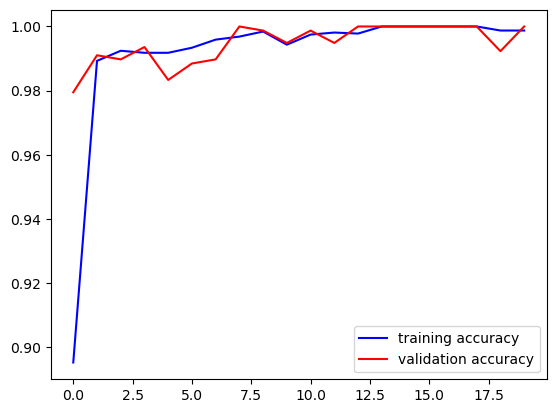

In [14]:
plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

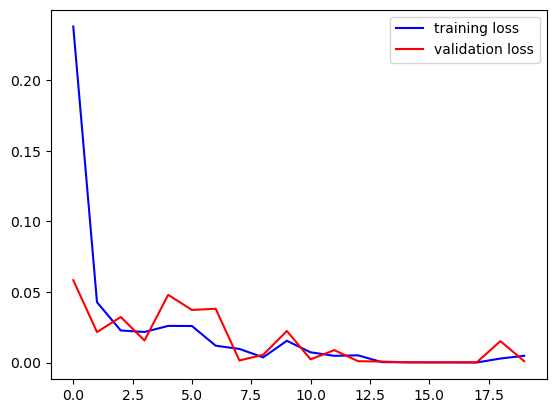

In [15]:
plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()